# Become Jr. BackProp NinJa

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Manual Backprop Trough XOR predict NN

In [3]:
# data
inputs = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
labels = torch.tensor([0., 1., 1., 0.]) # y

In [4]:
# W and B
w1 = torch.randn((2, 2), requires_grad=True)
b1 = torch.randn(2, requires_grad=True)
w2 = torch.randn((2, 1), requires_grad=True)
b2 = torch.randn((1), requires_grad=True)
learningRate = 0.1

# Forward Pass Equations
  * Let's denote:
    + x1, x2: input layer Neurons

    + w1,1: weight from x1 to the first hidden Layer neuron.

    + w2,1: weight from x2 to the first hidden Layer neuron.

    + w1,2: weight from x1 to the second hidden Layer neuron.

    + w2,2: weight from x2 to the second hidden Layer neuron.

    + v1, v2: weights from the hidden Layer neurons to the output Layer neuron.

    + b1, b2: biases for the hidden layer.

    + b_out: bias for the output neuron.

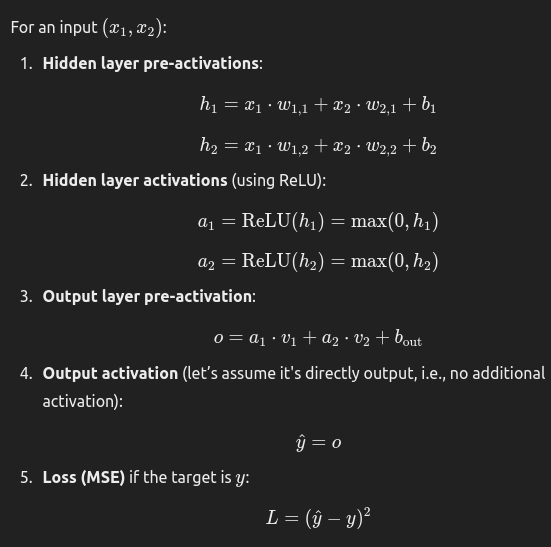

In [5]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

 grad of dyhat with respect to dv1, dv2, b_out
     //since:
        yhat = a1 * v1 + a2 * v2 + b_out
         
        // we find:
              dyhat/v1 = a1
              dyhat/v2 = a2
              dyhat/b_out = 1

       // Using the chain rule to compute grad with respect to v1, v2, b_out:
            
             + dl/dv1 = dl/dyhat * dyhat/dv1 = 2(yhat - y) * a1
             + dl/dv2 = dl/dyhat * dyhat/dv2 = 2(yhat - y) * a2
             + al/db_out = dl/dyhat * dy/db_out = 2(yhat - y)     

      // grad of yhat with  respect to a1 and a2
    
             + dyhat/da1 = v1
             + dyhat/da2 = v2

      // So the gradients with respect to a1, a2 (needed to propagate backwards) are:

              + dl/da1 = dl/dyhat * dyhat/da1 = 2 * (yhat - y) * v1
              + dl/da2 = 2 * (yhat - y) * v2

      // Gradients of ReLU Activation:
           * For ReLU, we know:

               + da1/ah1 = i if h1 >= 0, 0 if h1<= 0  
               + da1/ah2 = i if h2 >= 0, 0 if h2<= 0


       // The gradients are therefore:
               dl/dh1 = dl/da1 * da1/dh1
               dl/dh2 = dl/da2 * da2/dh2
               
       // Gradients with Respect to w1,1 , w2,1 , w1,1 , w2,2, b1, b2
           * Finally, using the chain rule for weights and biases:
               + for w1,1:
                   dl/dw1,1 = dl/dh1 * dh1/dw1,1 = dl/dh1 * x1
               
               + for w2,1:
                    dl/dw2,1 = dl/dh1 * x2

                + for b1:
                    dl/db1 = dl/dh1 * 1


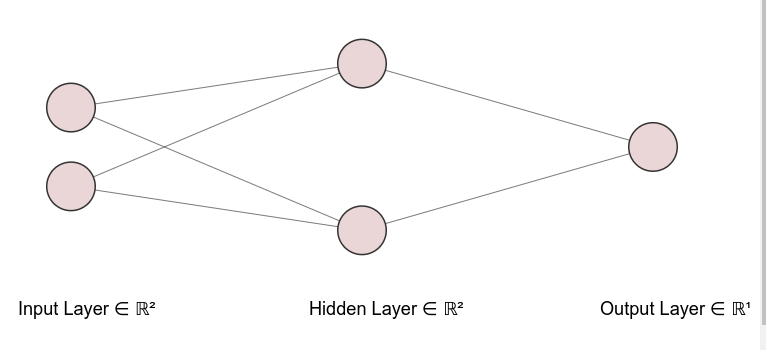

In [12]:
for i in range(100):
    totalLoss = 0

    #hidden_layer_input
    w1b1 = inputs @ w1 + b1
    #hidden_layer_output
    w1b1_Output = F.relu(w1b1)

    #output_layer_input
    w2b2 = w1b1_Output @ w2 + b2

    predict = sigmoid(w2b2) #yhat

    # Loss (Mean Squared Error)
    loss = torch.mean((predict.squeeze() - labels) ** 2)
    totalLoss += loss.item()

    #//Manual BackProp

    # dl/dyhat = 2 * (yhat - y)  //MSE derivativ
    dldyhat = 2 * (predict.squeeze() - labels) / len(labels)#grad_output

    # * dz:- grad of the loss with respect to the input of the activation (also called the          pre-activation)
    #dl/dz_output = dl/dyhat * yhat * (1 - yhat)
    dldyhat_output_input = dldyhat * predict * (1 - predict)#grad_output_input

    #the gradient of the loss with respect to the output layer weights.
    # dl/dw2 = w1b1_Output.T * dl/dz_output
    dldw2 = w1b1_Output.T @ dldyhat_output_input.view(-1, 1) #grad_w2

    #the gradient of the loss with respect to the output layer bias.
    #dl/db2 = sum(dl/dz_output)
    dldb2 = dldyhat_output_input.sum(0) #grad b2

#  // Backpropagate to hidden layer


    #backpropagates the error to the hidden layer.
    #dl/dhidden = dl/dz_output * w2.T
    dldhidden = dldyhat_output_input.view(-1, 1) @ w2.T #grad_hidden

    #dl/dz_hidden = dl/dhidden * Relu`(z_hidden)
    dldz_hidden = dldhidden * (w1b1 > 0).float() # #grad_hidden_input

    #the gradient of the loss with respect to the hidden layer weights.
    # dl/dw1 = inputs.T * dl/dz_hidden
    dldw1 = inputs.T @ dldz_hidden #grad_w1

    #the gradient of the loss with respect to the hidden layer bias.
    #dl/db1 = sum(dl/dz_hidden)
    dldb1 =  dldz_hidden.sum(0) #grad_b1


    # Update parameters manually
    w2.data += learningRate * dldw2
    b2.data += learningRate * dldb2
    w1.data += learningRate * dldw1
    b1.data += learningRate * dldb1

    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {totalLoss:.4f}")

print("Done Training.")








RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x4 and 16x1)

In [14]:
print("w1b1_Output shape:", w1b1_Output.shape)
print("dldyhat_output_input shape:", dldyhat_output_input.shape)


w1b1_Output shape: torch.Size([4, 2])
dldyhat_output_input shape: torch.Size([16, 1])
